# Explore and Summarize White Wine Quality Data

## Objective

Exploratory analysis in R in order to examine the relationship between 11 chemical and physical properties of a sample of white wines.

## Data Set

The data set named WineQualityWhites.csv' contains information on 11 chemical and physical properties for 4,898 white wines. Also included is a quality ranking and an explicit ID.

The data set was obtained from [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/wineQualityWhites.csv)

Here are the description of the columns of the data set :

| Column               | Description                                                                                                                          |
|----------------------|--------------------------------------------------------------------------------------------------------------------------------------|
| fixed acidity        | most acids involved with wine are fixed   or nonvolatile (do not evaporate readily) (tartaric acid - g / dm^3)                       |
| volatile acidity     | the amount of acetic acid in wine, which   at too high of levels can lead to an unpleasant, vinegar taste (acetic acid -   g / dm^3) |
| citric acid          | found in small quantities, citric acid   can add 'freshness' and flavor to wines (g / dm^3)                                          |
| residual sugar       | the amount of sugar remaining after   fermentation stops (g / dm^3)                                                                  |
| chlorides            | the amount of salt in the wine (sodium   chloride - g / dm^3                                                                         |
| free sulfur dioxide  | free form of SO2 exists in equilibrium   between molecular SO2 (as a dissolved gas) and bisulfite ion (mg / dm^3)                    |
| total sulfur dioxide | amount of free and bound forms of S02 (mg   / dm^3)                                                                                  |
| density              | the density of wine is close to that of   water depending on the percent alcohol and sugar content (g / cm^3)                        |
| pH                   | describes how acidic or basic a wine is   on a scale from 0 (very acidic) to 14 (very basic)                                         |
| sulphates            | a wine additive which can contribute to   sulfur dioxide gas (S02) levels (potassium sulphate - g / dm3)                             |
| alcohol              | the percent alcohol content of the wine   (% by volume)                                                                              |

## Reading and Exploring The Data

In [1]:
wine <- read.csv("C:/Users/i7/csv/wineQualityWhites.csv", header = TRUE, na.strings = c("NA", ""))
dim(wine)

[1] 4898   13

In [2]:
str(wine)

'data.frame':	4898 obs. of  13 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


In [3]:
summary(wine)

       X        fixed.acidity    volatile.acidity  citric.acid    
 Min.   :   1   Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 1st Qu.:1225   1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700  
 Median :2450   Median : 6.800   Median :0.2600   Median :0.3200  
 Mean   :2450   Mean   : 6.855   Mean   :0.2782   Mean   :0.3342  
 3rd Qu.:3674   3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900  
 Max.   :4898   Max.   :14.200   Max.   :1.1000   Max.   :1.6600  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.600   Min.   :0.00900   Min.   :  2.00      Min.   :  9.0       
 1st Qu.: 1.700   1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0       
 Median : 5.200   Median :0.04300   Median : 34.00      Median :134.0       
 Mean   : 6.391   Mean   :0.04577   Mean   : 35.31      Mean   :138.4       
 3rd Qu.: 9.900   3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0       
 Max.   :65.800   Max.   :0.34600   Max.   :289.00      Max.   :440.0

In [4]:
print(head(wine, 5))

  X fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1 1           7.0             0.27        0.36           20.7     0.045
2 2           6.3             0.30        0.34            1.6     0.049
3 3           8.1             0.28        0.40            6.9     0.050
4 4           7.2             0.23        0.32            8.5     0.058
5 5           7.2             0.23        0.32            8.5     0.058
  free.sulfur.dioxide total.sulfur.dioxide density   pH sulphates alcohol
1                  45                  170  1.0010 3.00      0.45     8.8
2                  14                  132  0.9940 3.30      0.49     9.5
3                  30                   97  0.9951 3.26      0.44    10.1
4                  47                  186  0.9956 3.19      0.40     9.9
5                  47                  186  0.9956 3.19      0.40     9.9
  quality
1       6
2       6
3       6
4       6
5       6


## Pre-Process The Data

In [5]:
#create new sulf.ratio series and assign ratio of free to total sulfur dioxide
wine$sulf.ratio <- wine$free.sulfur.dioxide / wine$total.sulfur.dioxide

In [6]:
summary(wine$sulf.ratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02362 0.19090 0.25370 0.25560 0.31580 0.71050 

Additionally, two new category series were created:

    'quality.rating': Categorizes wine quality score into three new categories: 1:Poor (5 score or less), 2:Good (6 score), 3:Great (7 score or greater).
    'alcohol.rating': Categorizes wine alcohol content into three new categories: 1:Light (9% or less), 2:Mild (between 10% and 12%), 3:Strong (12% or greater).

In [7]:
#create new wine.rating series and assign category number according to score
wine$quality.rating[wine$quality <= 5] = 1
wine$quality.rating[wine$quality > 5 & wine$quality < 7] = 2
wine$quality.rating[wine$quality >= 7] = 3

#create new alcohol.rating series and assign category number according to alcohol content
wine$alcohol.rating[wine$alcohol <= 10] = 1
wine$alcohol.rating[wine$alcohol > 10 & wine$alcohol < 12] = 2
wine$alcohol.rating[wine$alcohol >= 12] = 3

In [8]:
summary(wine$quality.rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.882   2.000   3.000 

In [9]:
summary(wine$alcohol.rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    2.00    1.74    2.00    3.00 

## Univariate Analysis

Histograms were generated for each of the original dataset variables.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


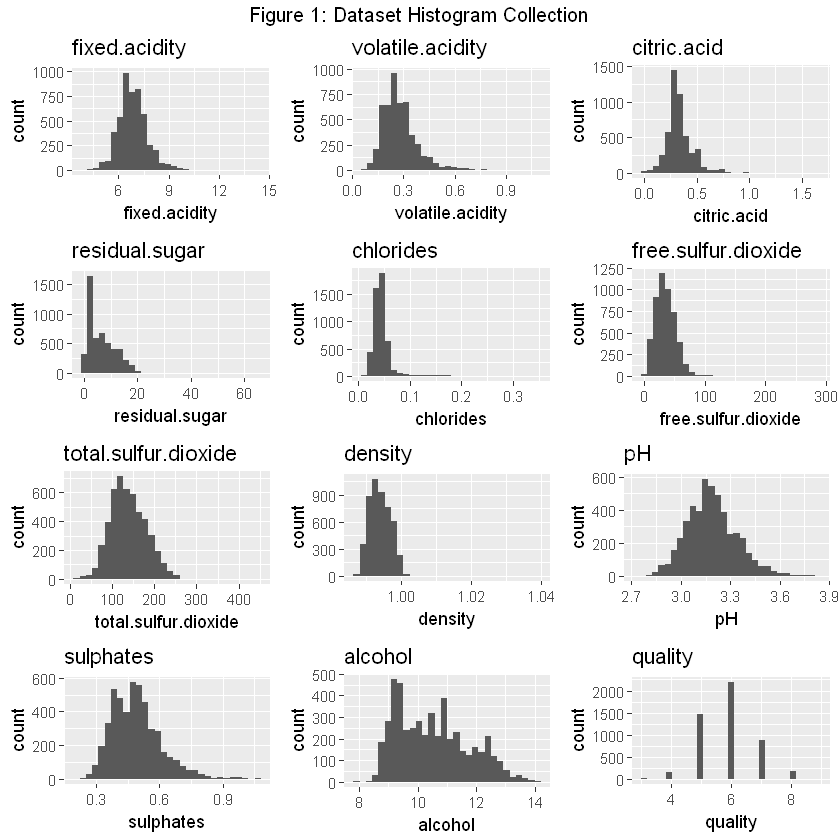

In [10]:
library(ggplot2)
library(gridExtra)

datacolnames <- colnames(wine)

for (i in 2:length(datacolnames)) { #loop through each dataset variable and create histrogram plot
  
  plot <- ggplot(data = wine,
    aes_string(x = datacolnames[i])) +
    geom_histogram() + 
    ggtitle(datacolnames[i])
  
  assign(paste("plot", i, sep = ""), plot) #assign plot with an incremented plot[i] name

}

grid.arrange(plot2, plot3, plot4, plot5, plot6, plot7, #arrange plots in single grid
             plot8, plot9, plot10, plot11, plot12, plot13, 
             ncol = 3, 
             top = "Figure 1: Dataset Histogram Collection")

#### Observations :

The majority of variables are approximately normally distributed and many have a positive skew. Judging by the automatically adjusted scale on each distribution, it seems there are also a small number of outliers within some variables.

#### Histogram and summary metrics for total sulfur dioxide.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.0   108.0   134.0   138.4   167.0   440.0 

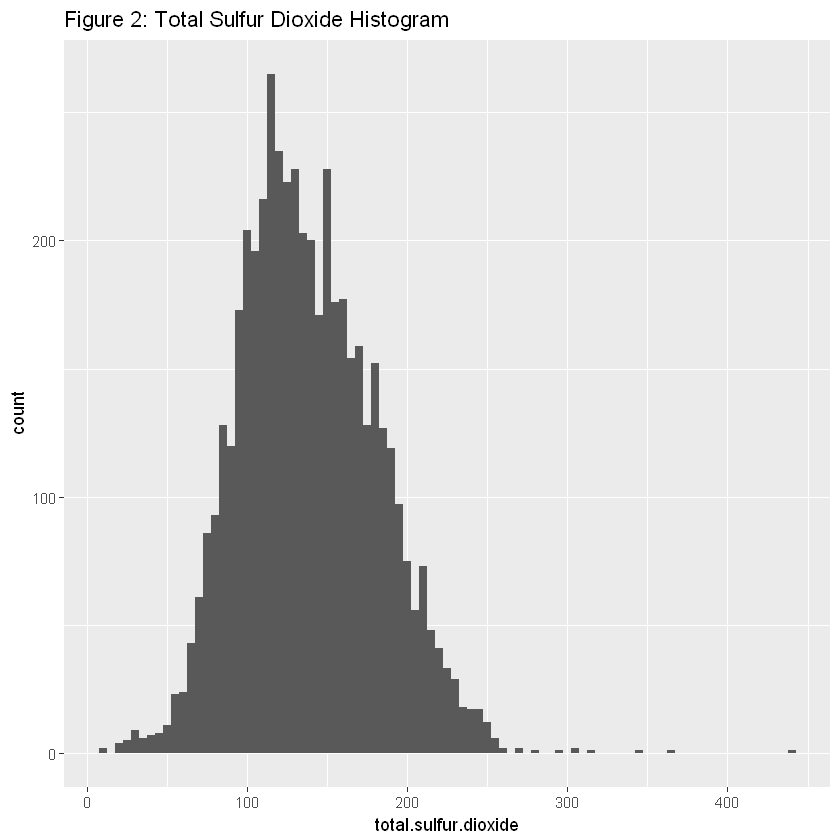

In [11]:
library(ggplot2)

ggplot(data = wine,
  aes(x = total.sulfur.dioxide)) +
  geom_histogram(binwidth = 5) +
  ggtitle("Figure 2: Total Sulfur Dioxide Histogram")

summary(wine$total.sulfur.dioxide)

The min free sulfur dioxide value is 9.0 mg/dm^3, the max is 440.0 mg/dm^3. it seems the 440 mg/dm^3 is an outlier.

#### Histogram and summary metrics excluding observations where free sulfur dioxide is greater than 300 mg/dm^3. 

ERROR: Error in summary(winesub$total.sulfur.dioxide): object 'winesub' not found


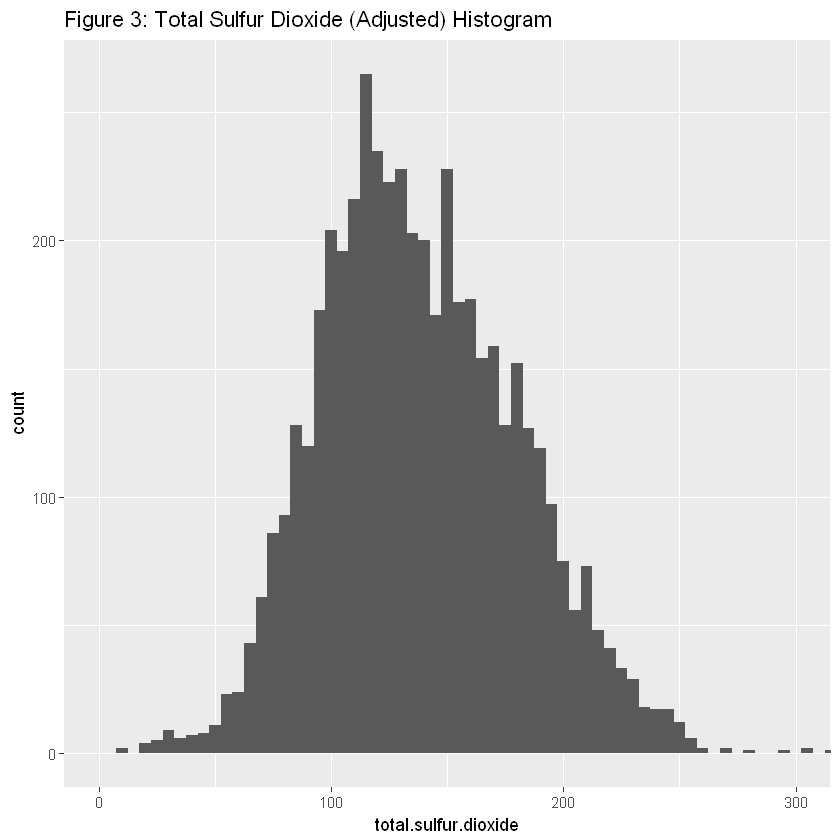

In [12]:
ggplot(data = wine,
  aes(x = total.sulfur.dioxide)) +
  geom_histogram(binwidth = 5) +
  coord_cartesian(xlim = c(0, 300)) +
  ggtitle("Figure 3: Total Sulfur Dioxide (Adjusted) Histogram")

data_winesub <- subset(wine, wine$total.sulfur.dioxide < 300) #subset data by total sulfur dioxide limit prior to summary
summary(winesub$total.sulfur.dioxide)

Each wine has both a free sulfur dioxide count and total sulfur dioxide count. The below shows a histogram and summary metrics for the ratio of the two.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02362 0.19090 0.25370 0.25560 0.31580 0.71050 

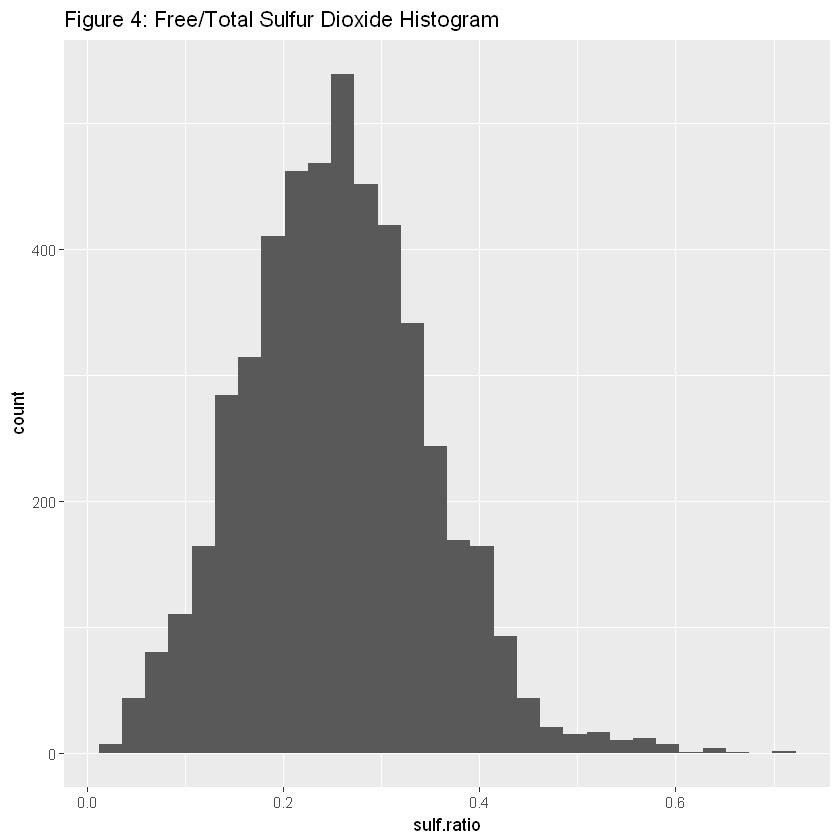

In [13]:
ggplot(data = wine, aes(x = sulf.ratio)) +
  geom_histogram() +
  ggtitle("Figure 4: Free/Total Sulfur Dioxide Histogram")

summary(wine$sulf.ratio)

#### The below shows a histogram and summary metrics for wine pH. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.720   3.090   3.180   3.188   3.280   3.820 

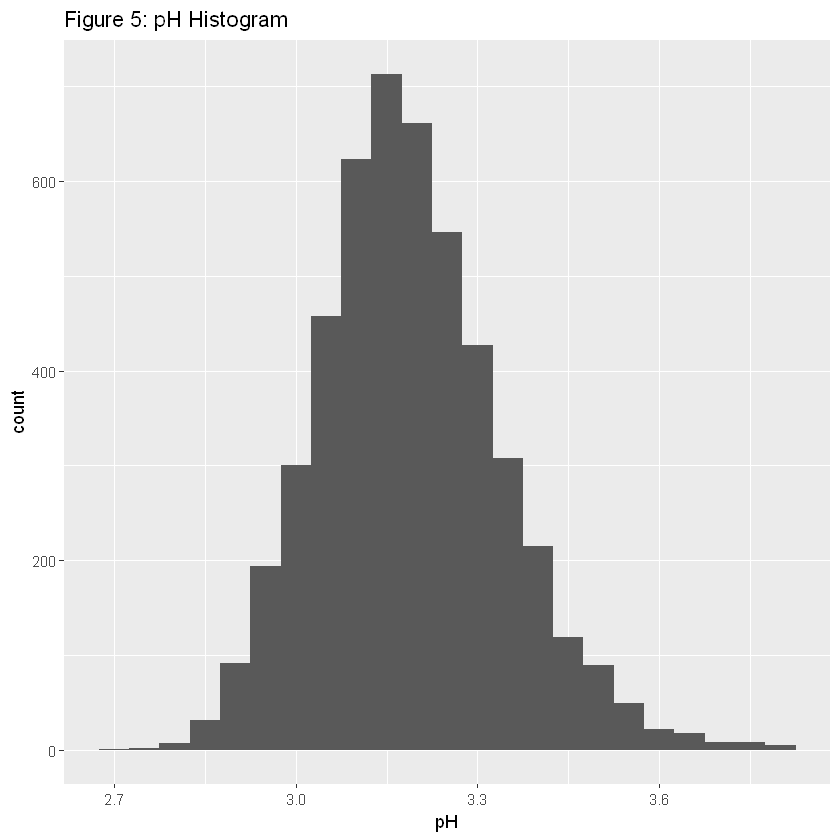

In [14]:
ggplot(data = wine, aes(x = pH)) +
  geom_histogram(binwidth = 0.05) +
  ggtitle("Figure 5: pH Histogram")

summary(wine$pH)

Based on recorded pH levels, it seems the tested wines are acidic (pH < 7) falling within the range of 2.7 pH to 3.8 pH.